<a href="https://colab.research.google.com/github/msuman-07/ML-Projects/blob/main/Clustering_Income_and_Spending_Using_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from google.colab import files

In [13]:
# Upload and load the dataset
uploaded = files.upload()
dataset = pd.read_csv('Employee_Income_Dataset.csv')

Saving Employee_Income_Dataset.csv to Employee_Income_Dataset (2).csv


In [14]:
# Encode categorical data (e.g., 'Gender')
label_encoder = preprocessing.LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])

**Segregate Dataset into Input X & Output Y**

In [15]:
# Split dataset into features and target
X = dataset.iloc[:, :-1].values  # All columns except the last one
Y = dataset.iloc[:, -1].values   # Only the last column

In [16]:
# Apply Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='average')
y_means = model.fit_predict(X)

# Add cluster labels to the dataset
dataset_with_cluster = pd.DataFrame(dataset)
dataset_with_cluster['Cluster'] = y_means

In [17]:
# Display the complete clustered dataset
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust the width to fit the entire DataFrame
pd.set_option('display.colheader_justify', 'center')  # Center-align the column headers
print(dataset_with_cluster)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score  Cluster
0          1        1    40            35                39          3   
1          2        1    66            79                45          3   
2          3        1    30            94                87          1   
3          4        1    19            62                37          3   
4          5        0    31            36                 9          3   
5          6        0    45           133                38          1   
6          7        0    64            61                16          3   
7          8        1    19            99                83          1   
8          9        0    48           116                20          1   
9         10        1    45            73                41          3   
10        11        0    59            53                88          3   
11        12        1    39           104                62          1   
12        13        1    52           

In [18]:
# Plot clusters based on Income and Spent (Assuming columns 3 and 4 are 'Income' and 'Spent')
X_plot = dataset.iloc[:, [3, 4]].values  # Adjust indices if needed

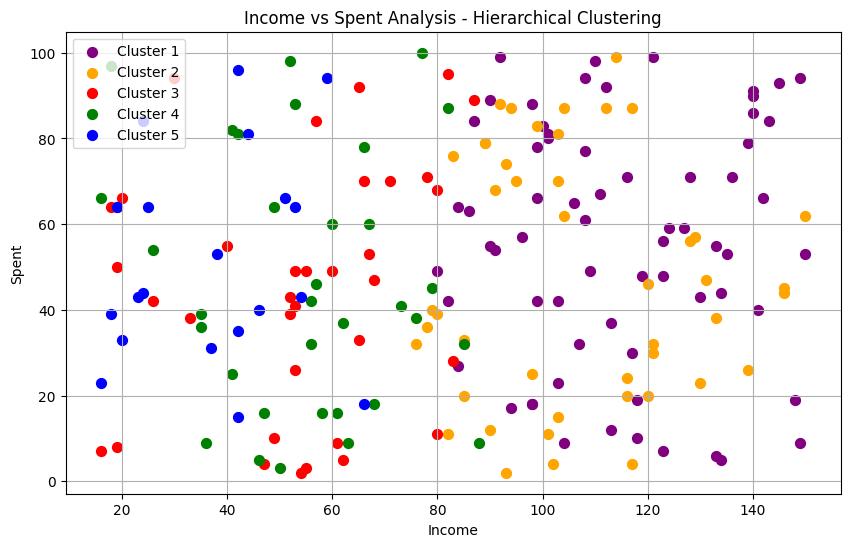

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(X_plot[y_means == 0, 0], X_plot[y_means == 0, 1], s=50, c='purple', label='Cluster 1')
plt.scatter(X_plot[y_means == 1, 0], X_plot[y_means == 1, 1], s=50, c='orange', label='Cluster 2')
plt.scatter(X_plot[y_means == 2, 0], X_plot[y_means == 2, 1], s=50, c='red', label='Cluster 3')
plt.scatter(X_plot[y_means == 3, 0], X_plot[y_means == 3, 1], s=50, c='green', label='Cluster 4')
plt.scatter(X_plot[y_means == 4, 0], X_plot[y_means == 4, 1], s=50, c='blue', label='Cluster 5')

plt.title('Income vs Spent Analysis - Hierarchical Clustering')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.legend()
plt.grid(True)
plt.show()